In [174]:
import pickle, gzip
from sklearn import datasets
import numpy as np
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from keras.models import Sequential
from keras.utils import to_categorical

In [30]:
with open('mnist.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [35]:
train_set, valid_set, test_set = p

In [117]:
X_train = train_set[0].reshape(50000, 28, 28, 1)
Y_train = train_set[1]

X_test = test_set[0].reshape(10000, 28, 28, 1)
Y_test = test_set[1]

X_valid = valid_set[0].reshape(10000, 28, 28, 1)
Y_valid = valid_set[1]

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_valid = to_categorical(Y_valid)

In [118]:
def leNet():
    model = Sequential()
    model.add( Conv2D(64, kernel_size = (3, 3)) )
    model.add( MaxPooling2D( pool_size = (2, 2) ) )
    model.add( Conv2D(32, kernel_size = 3, strides = 1) )
    model.add( MaxPooling2D( pool_size = (2, 2) ) )
    model.add( Flatten() )
    model.add( Dense(32, activation = 'relu' ) )
    model.add( Dense(10, activation = 'sigmoid' ) )
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [119]:
model = leNet()

In [121]:
history = model.fit(X_train, Y_train, batch_size = 20, validation_data=(X_test, Y_test), epochs=3)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 34s 689us/step - loss: 0.1244 - acc: 0.9623 - val_loss: 0.0710 - val_acc: 0.9782
Epoch 2/3
50000/50000 [==============================] - 33s 669us/step - loss: 0.0699 - acc: 0.9784 - val_loss: 0.0513 - val_acc: 0.9833
Epoch 3/3
50000/50000 [==============================] - 33s 663us/step - loss: 0.0539 - acc: 0.9832 - val_loss: 0.0501 - val_acc: 0.9849


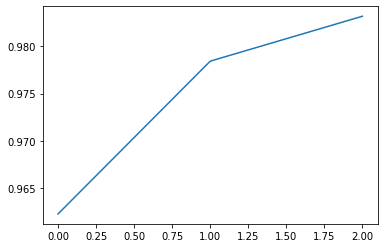

In [125]:
plt.plot(history.history['acc'])

In [128]:
model.predict(X_test[:4])

array([[3.2782555e-07, 0.0000000e+00, 1.0251999e-05, 5.2034855e-05,
        0.0000000e+00, 1.4901161e-07, 0.0000000e+00, 9.8918879e-01,
        0.0000000e+00, 1.2516975e-06],
       [1.7076731e-05, 5.0663948e-06, 9.9492013e-01, 0.0000000e+00,
        0.0000000e+00, 1.4901161e-07, 2.1755695e-06, 0.0000000e+00,
        1.1920929e-07, 0.0000000e+00],
       [7.1525574e-07, 1.2685061e-01, 4.1425228e-06, 0.0000000e+00,
        4.9740076e-05, 1.1265278e-05, 1.4901161e-07, 1.1682510e-05,
        2.3841858e-07, 1.7881393e-07],
       [3.3511072e-01, 0.0000000e+00, 5.9604645e-08, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.3676624e-06, 0.0000000e+00,
        2.0861626e-07, 0.0000000e+00]], dtype=float32)

In [109]:
to_categorical([1 ,2 , 3, 4, 10])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

[9, 6, 6, 5, 4, 0, 7, 4, 0, 1]


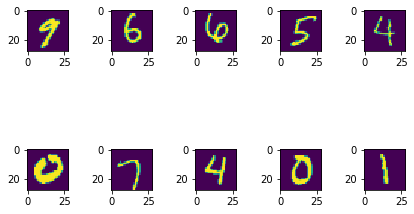

In [173]:
images_to_show = X_test[20:30]
_, ax = plt.subplots(nrows = int(len(images_to_show)/5), ncols = 5)
plt.tight_layout()
count = 0
while True:
    if count >= len(images_to_show):
        break
    ax[ int(count/5) ][ count%5 ].imshow(images_to_show[count].reshape(28, 28))
    count += 1

predictions = model.predict(images_to_show)
print( [ list(images).index(max(images)) for images in model.predict(images_to_show) ] )

In [172]:
predictions

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.96046448e-08,
        5.24520874e-06, 8.94069672e-08, 0.00000000e+00, 1.06006861e-04,
        3.18884850e-06, 3.66499513e-01],
       [0.00000000e+00, 0.00000000e+00, 2.98023224e-08, 0.00000000e+00,
        1.78813934e-07, 1.18255615e-04, 5.65655589e-01, 0.00000000e+00,
        1.37090683e-06, 8.94069672e-08],
       [2.26497650e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.08419073e-02, 0.00000000e+00,
        8.34465027e-07, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.50015068e-06,
        0.00000000e+00, 9.70094085e-01, 1.40070915e-06, 0.00000000e+00,
        5.36441803e-07, 2.68220901e-07],
       [1.19209290e-07, 1.28149986e-06, 9.11951065e-06, 0.00000000e+00,
        9.54451323e-01, 0.00000000e+00, 8.94069672e-07, 4.82797623e-06,
        2.08616257e-07, 1.88708305e-04],
       [9.86901700e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [175]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total para